### CAPSTONE PROJECT-3

###Project Name:- Sentiment Analysis on Hotel Reviews

####**Brief on the Project**:- Hotel sentiment analysis is a process that uses natural language processing (NLP) to determine the emotional tone behind customer feedback. This feedback is typically found in online reviews, social media posts, and surveys. Hotel Sentiment Analysis typically involves analyzing customer reviews to determine their sentiments—whether they are positive,or negative. Here's a brief overview:

####**Objective**: To help hotels understand customer feedback and improve their services by analyzing reviews.

####**Techniques Used**: Natural Language Processing (NLP) methods like text cleaning, tokenization, and sentiment classification using machine learning models (e.g., Logistic Regression, Multinomial Naive Bayes). Explore advanced deep learning techniques (e.g. LSTMs) for context-aware sentiment analysis.

#### **Tools and Libraries**:-Python Libraries: Pandas, NumPy, NLTK,Scikit-learn, TensorFlow.

#### **Visualization Tools**:- Matplotlib, and Seaborn.

#### **Expected Outputs**:-

*   Sentiment scores or labels for each review (e.g., "positive," "negative").
*   Insights into recurring customer concerns or praises.

### Project Created by:-KP Narayanan

### Project Timeline:-23rd March2025

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


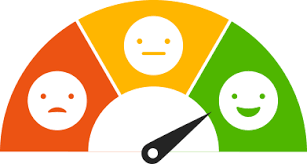

In [ ]:
from IPython import display
display.Image('/content/sentiment analysis images.png')

#### Downloading the Data

#### Unzipping the File

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Hotel_Reviews.csv.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

#### Loading the CSV data

In [ ]:
hs = pd.read_csv('/content/Hotel_Reviews.csv')

#### Exploratory Data Analysis

In [ ]:
#To know the shape of the Data set
hs.shape

(515738, 17)

In [ ]:
# Display first 5 rows of the Data set
hs.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
#Listing the column Names
hs.columns.tolist()

['Hotel_Address',
 'Additional_Number_of_Scoring',
 'Review_Date',
 'Average_Score',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Positive_Review',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'Tags',
 'days_since_review',
 'lat',
 'lng']

In [ ]:
#Information on the Data set
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [ ]:
# Checking the Null Values in the Data set
hs.isna().sum()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


In [ ]:
# Dropping the Null Values
hs.dropna(inplace=True,axis=0)

In [ ]:
# checking the Duplicate Values
hs.duplicated().sum()

526

In [ ]:
# Dropping the Duplicate Values
hs.drop_duplicates(inplace=True)

In [ ]:
#Checking Unique Nationality
hs.Reviewer_Nationality.nunique()

227

In [ ]:
#Checking Unique Hotel Name
hs.Hotel_Name.nunique()

1475

In [ ]:
#Using desribe Function to check the distribution
hs.Reviewer_Score.describe().T

,Reviewer_Score
count,511944.000000
mean,8.396053
std,1.637778
min,2.500000
25%,7.500000
50%,8.800000
75%,9.600000
max,10.000000


#### Data Visualization

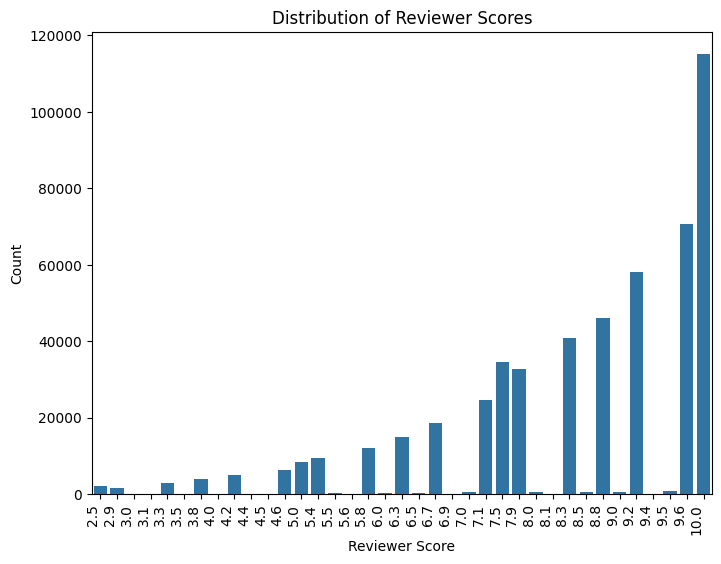

In [ ]:
import seaborn as sns
# Distribution of Reviewer Scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Reviewer_Score', data=hs)
plt.title('Distribution of Reviewer Scores')
plt.xlabel('Reviewer Score')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

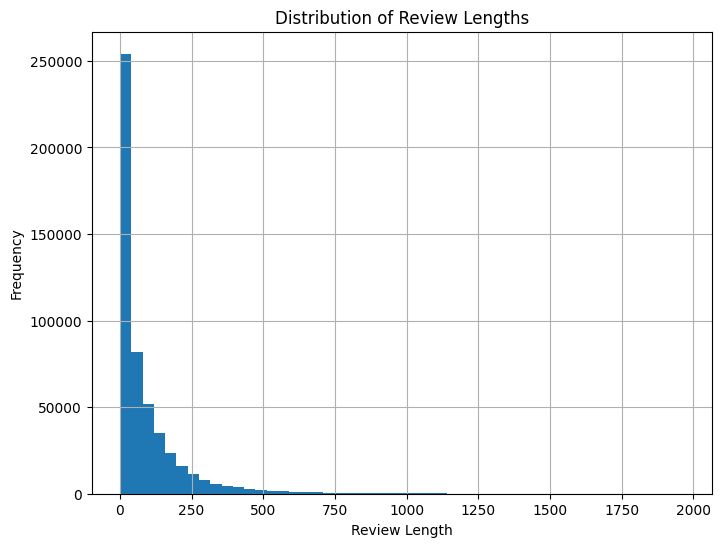

In [ ]:
# Review Length Distribution
hs['review_length'] = hs['Negative_Review'].apply(len)
plt.figure(figsize=(8, 6))
hs['review_length'].hist(bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()


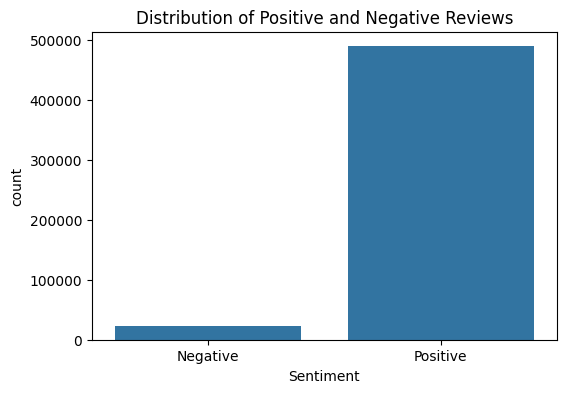

In [ ]:
# Distribution of positive and negative reviews
plt.figure(figsize=(6, 4))
hs['Sentiment'] = hs['Reviewer_Score'].apply(lambda score: 'Positive' if score >= 5 else 'Negative')
sns.countplot(x='Sentiment', data=hs)
plt.title('Distribution of Positive and Negative Reviews')
plt.show()


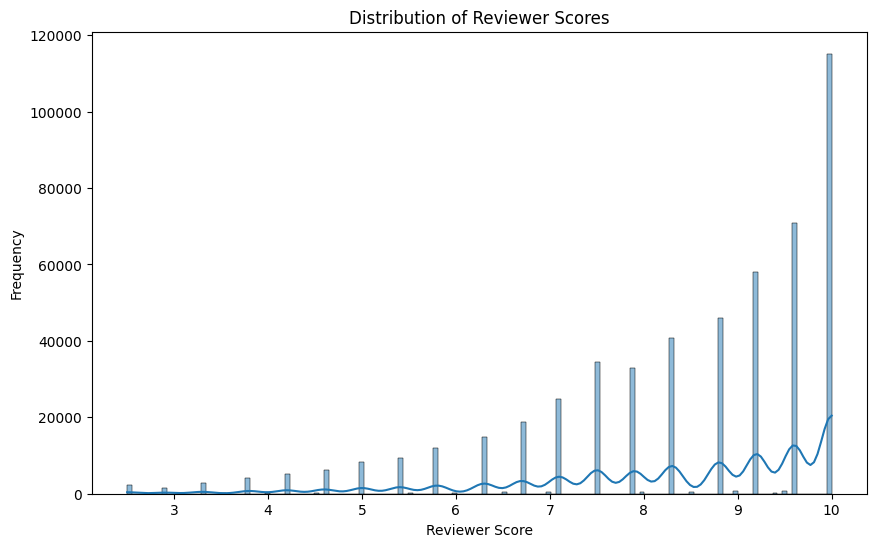

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(hs['Reviewer_Score'], kde=True)
plt.title('Distribution of Reviewer Scores')
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')
plt.show()

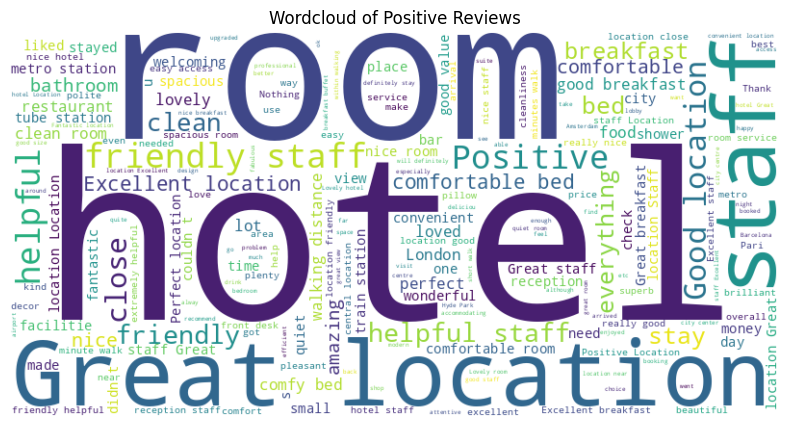

In [ ]:
# Word Cloud for Positive Reviews
def create_wordcloud(text, title):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show()

positive_reviews = ' '.join(hs['Positive_Review'].astype(str))
create_wordcloud(positive_reviews, 'Wordcloud of Positive Reviews')

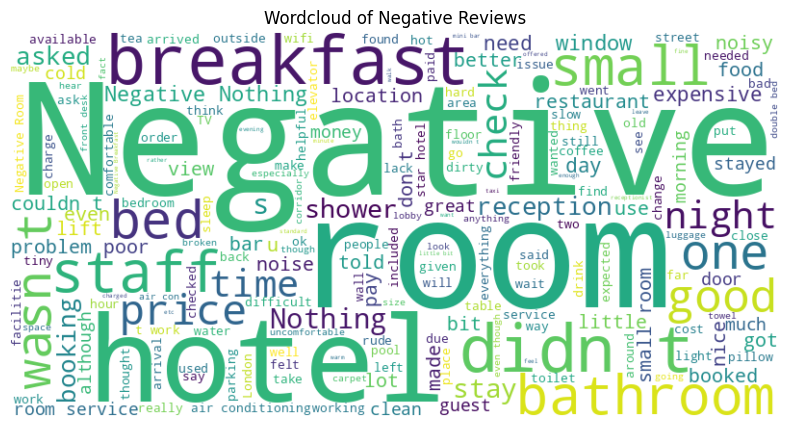

In [ ]:
# Word Cloud for Negative Reviews
negative_reviews = ' '.join(hs['Negative_Review'].astype(str))
create_wordcloud(negative_reviews, 'Wordcloud of Negative Reviews')

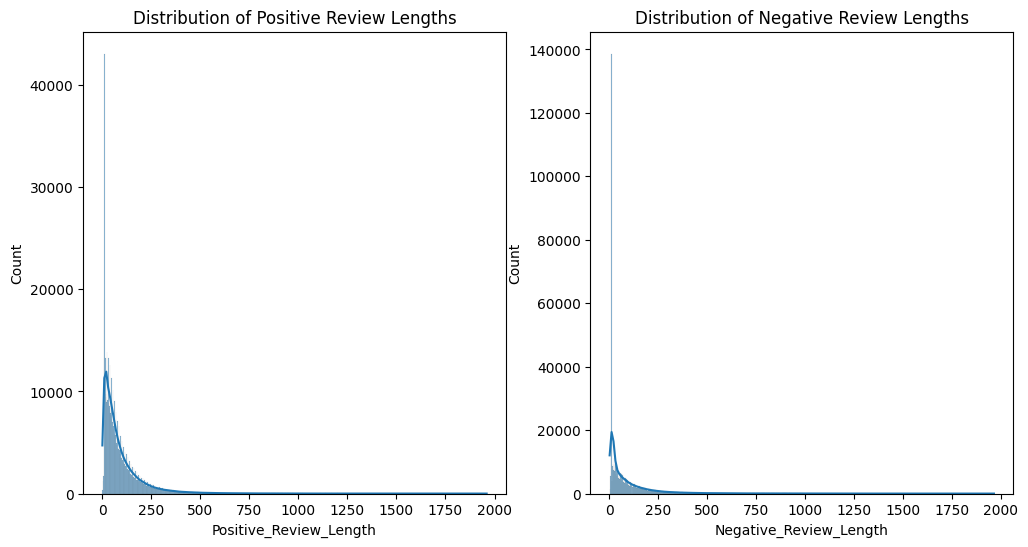

In [ ]:
# Review Length Distributions (separate for positive and negative)
hs['Positive_Review_Length'] = hs['Positive_Review'].astype(str).apply(len)
hs['Negative_Review_Length'] = hs['Negative_Review'].astype(str).apply(len)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(hs['Positive_Review_Length'], kde=True)
plt.title('Distribution of Positive Review Lengths')

plt.subplot(1, 2, 2)
sns.histplot(hs['Negative_Review_Length'], kde=True)
plt.title('Distribution of Negative Review Lengths')
plt.show()

#### Top 10 Reviewers Nationality

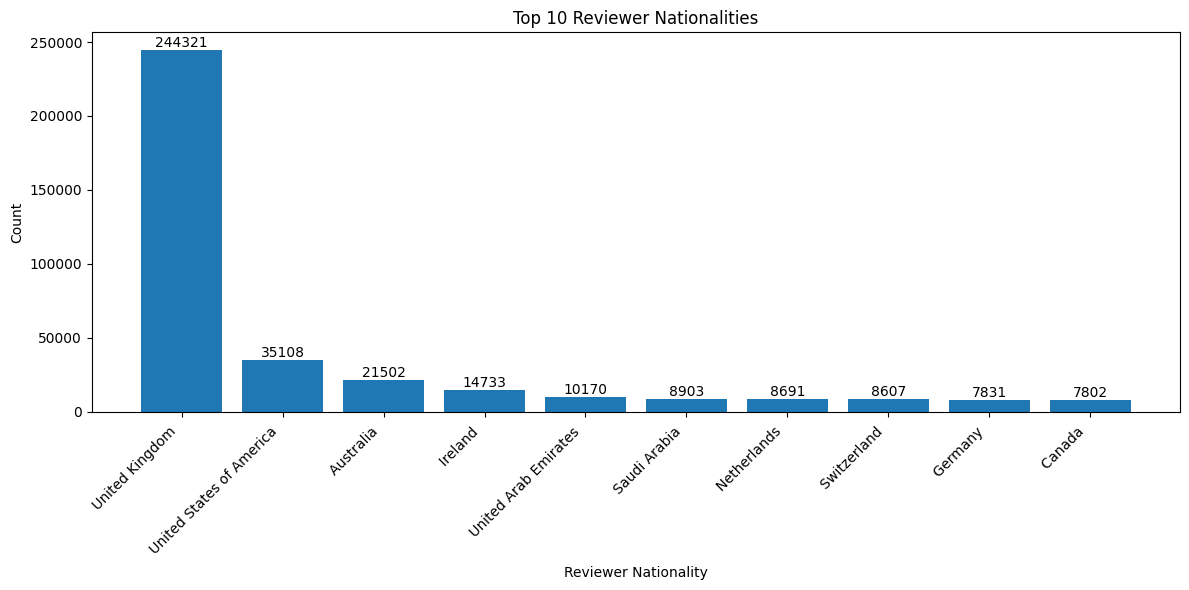

In [ ]:
top_10_nationalities = hs['Reviewer_Nationality'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_nationalities.index, top_10_nationalities.values)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Reviewer Nationality')
plt.ylabel('Count')
plt.title('Top 10 Reviewer Nationalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Top 10 Hotels with Maximum reviews

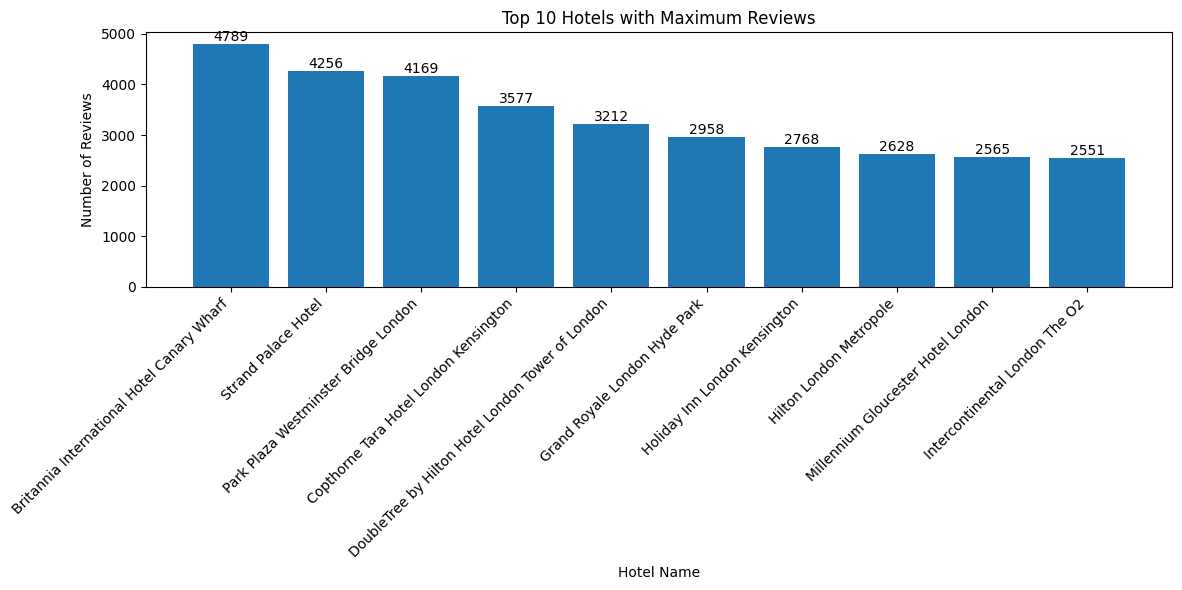

In [ ]:
top_hotels = hs['Hotel_Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_hotels.index, top_hotels.values)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Hotel Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Hotels with Maximum Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Distribution of Reviewer Scores

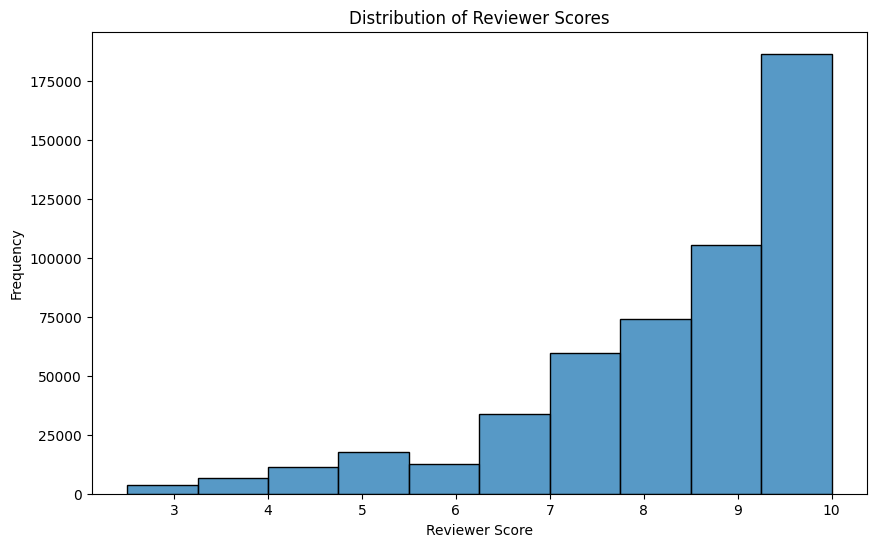

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(hs['Reviewer_Score'], kde=False, bins=10)
plt.title('Distribution of Reviewer Scores')
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')
plt.show()


#### Distribution of Average scores

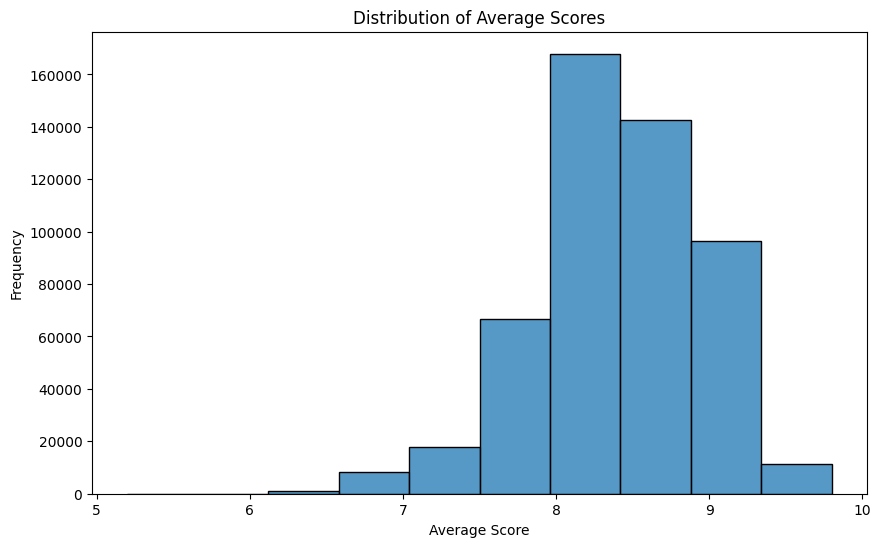

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(hs['Average_Score'], kde=False, bins=10)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Replacing the uncommented values of Reviewers with blank space
hs['Negative_Review'] = hs['Negative_Review'].replace('No Negative', '')
hs['Positive_Review'] = hs['Positive_Review'].replace('No Positive', '')

In [ ]:
hs['Negative_Review'][1]

''

In [ ]:
# Concatenating both Negative and Positive Reviews in one column
hs["Total_Review"] = hs["Negative_Review"] + hs["Positive_Review"]

In [ ]:
#Filtering the reviewer scores under two categories
hs["review_type"] = hs["Reviewer_Score"].apply(lambda x: "Bad_feedback" if x < 7 else "Good_feedback")

In [ ]:
#Creating a new data Frame
hs_reviews = hs[["Total_Review", "review_type"]]

In [ ]:
#Fetching the data of new Data Frame
hs_reviews

,Total_Review,review_type
0,I am so angry that i made this post available...,Bad_feedback
1,No real complaints the hotel was great great ...,Good_feedback
2,Rooms are nice but for elderly a bit difficul...,Good_feedback
3,My room was dirty and I was afraid to walk ba...,Bad_feedback
4,You When I booked with your company on line y...,Bad_feedback
...,...,...
515733,no trolly or staff to help you take the lugga...,Good_feedback
515734,The hotel looks like 3 but surely not 4 Brea...,Bad_feedback
515735,The ac was useless It was a hot week in vienn...,Bad_feedback
515736,The rooms are enormous and really comfortable...,Good_feedback


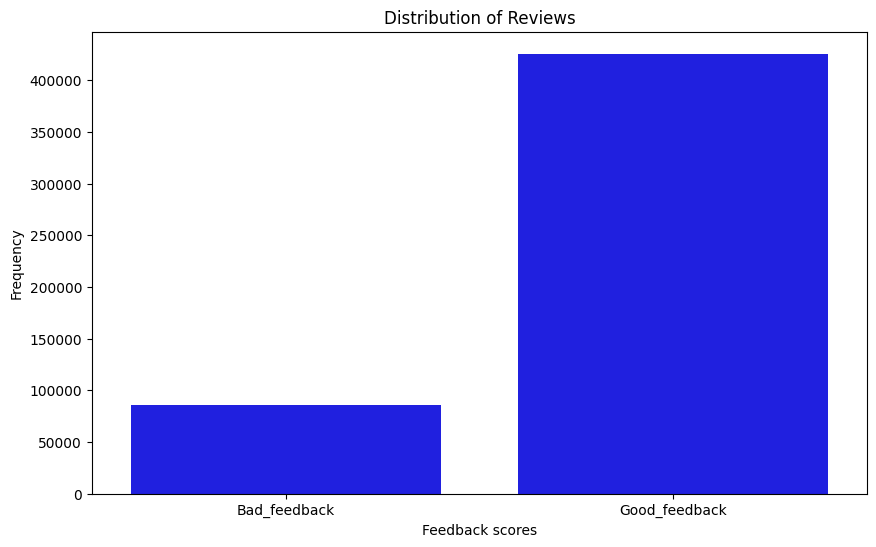

In [ ]:
# Visualizing the Distribution of Reviews through count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=hs_reviews, x="review_type",color='b')
plt.title('Distribution of Reviews')
plt.xlabel('Feedback scores')
plt.ylabel('Frequency')
plt.show()

In [ ]:
hs_reviews['review_type'].value_counts()

,count
review_type,
Good_feedback,425769
Bad_feedback,86175


### TEXT PREPROCESSING

In [ ]:
# Converting all the text to lower case to have the uniformity
hs_reviews["Total_Review"] = hs_reviews["Total_Review"].str.lower()
print(hs_reviews["Total_Review"])

0          i am so angry that i made this post available...
1          no real complaints the hotel was great great ...
2          rooms are nice but for elderly a bit difficul...
3          my room was dirty and i was afraid to walk ba...
4          you when i booked with your company on line y...
                                ...                        
515733     no trolly or staff to help you take the lugga...
515734     the hotel looks like 3 but surely not 4  brea...
515735     the ac was useless it was a hot week in vienn...
515736     the rooms are enormous and really comfortable...
515737     i was in 3rd floor it didn t work free wife  ...
Name: Total_Review, Length: 511944, dtype: object


<ipython-input-21-f7c8635434a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_reviews["Total_Review"] = hs_reviews["Total_Review"].str.lower()


In [ ]:
# Import regular expression technique
import re

In [ ]:
#Remove HTML tags
def stripHTML(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [ ]:
#Remove square brackets
def removeSqBkts(text):
    return re.sub('\[[^]]*\]', '', text)

In [ ]:
#Remove URls
def remove_url(text):
    return re.sub('https?://\S+|www\.\S+','',text)

In [ ]:
def denoiseText(text):
    text = stripHTML(text)
    text = removeSqBkts(text)
    text = remove_url(text)
    return text

In [ ]:
#Apply to the text column
hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(denoiseText)

<ipython-input-27-af2217c5fa8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(denoiseText)


In [ ]:
#remove digits
def remove_digits(text):
      pattern = r'[\d+]'
      text = re.sub(pattern, '', text)
      return  text

In [ ]:
hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(remove_digits)

<ipython-input-29-efc5e286d311>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(remove_digits)


In [ ]:
#Remove special characters
def removeSplCh(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

In [ ]:
hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(removeSplCh)

<ipython-input-31-2f29fe2b2efb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(removeSplCh)


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Selecting English stop words
stopwordList = nltk.corpus.stopwords.words('english')

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
#Removing Stop words
def removeStopWords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filteredTokens = [token for token in tokens if token.lower() not in stopwordList]
    filteredText = ' '.join(filteredTokens)
    return filteredText

In [ ]:
hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(removeStopWords)

<ipython-input-38-48416793b42b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(removeStopWords)


In [ ]:
#Using stemmer function to optimize the words having Dictionary meaning
def myStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [ ]:
hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(myStemmer)

<ipython-input-40-0b0ba827c33e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_reviews["Total_Review"] = hs_reviews["Total_Review"].apply(myStemmer)


In [ ]:
hs_reviews.head()

,Total_Review,review_type
0,angri made post avail via possibl site use pla...,Bad_feedback
1,real complaint hotel great great locat surroun...,Good_feedback
2,room nice elderli bit difficult room two stori...,Good_feedback
3,room dirti afraid walk barefoot floor look cle...,Bad_feedback
4,book compani line show pictur room thought get...,Bad_feedback


In [ ]:
#Using Label encoder to convert text into numerical numbers
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
hs_reviews['sentiment_score'] = labenc.fit_transform(hs_reviews['review_type'])

<ipython-input-42-a801b812963a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_reviews['sentiment_score'] = labenc.fit_transform(hs_reviews['review_type'])


In [ ]:
hs_reviews.head()

,Total_Review,review_type,sentiment_score
0,angri made post avail via possibl site use pla...,Bad_feedback,0
1,real complaint hotel great great locat surroun...,Good_feedback,1
2,room nice elderli bit difficult room two stori...,Good_feedback,1
3,room dirti afraid walk barefoot floor look cle...,Bad_feedback,0
4,book compani line show pictur room thought get...,Bad_feedback,0


In [ ]:
hs_reviews.drop('review_type',axis=1,inplace=True)

<ipython-input-44-d270ebdf9266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_reviews.drop('review_type',axis=1,inplace=True)


In [ ]:
hs_reviews.head(3)

,Total_Review,sentiment_score
0,angri made post avail via possibl site use pla...,0
1,real complaint hotel great great locat surroun...,1
2,room nice elderli bit difficult room two stori...,1


### MODEL BUILDING

#### Splitting the Data set into X & Y variables

In [ ]:
from sklearn.model_selection import train_test_split
X = hs_reviews['Total_Review']
y = hs_reviews['sentiment_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((409555,), (102389,), (409555,), (102389,))

#### Converting Text into Vectors through TF-IDF Vectorization method

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#### Using Machine Learning model Logistic Regression for Modelling.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8808368086415533


In [ ]:
# Printing the performance Matrix of Logistic Regression
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.47      0.57     17139
           1       0.90      0.96      0.93     85250

    accuracy                           0.88    102389
   macro avg       0.81      0.72      0.75    102389
weighted avg       0.87      0.88      0.87    102389



#### Using Machine Learning model Multinomial Naive Bayes for Text classification.

In [ ]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred_mnb = mnb.predict(X_test_tfidf)


In [ ]:
# Evaluate the model
print(f"Multinomial Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_mnb)}")
print(classification_report(y_test, y_pred_mnb))

Multinomial Naive Bayes Accuracy: 0.8644776294328492
              precision    recall  f1-score   support

           0       0.76      0.28      0.41     17139
           1       0.87      0.98      0.92     85250

    accuracy                           0.86    102389
   macro avg       0.81      0.63      0.67    102389
weighted avg       0.85      0.86      0.84    102389



# Deep Learning Model

### LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
# Hyperparameters
vocab_size = 5000
max_length = 200
embedding_dim = 100

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

In [ ]:
# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad sequences to the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
checkpoint = ModelCheckpoint('best_model.h5',monitor='val_accuracy',save_best_only=True,mode='max', verbose=1)
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_pad, y_train,epochs=5,batch_size=32,validation_data=(X_test_pad, y_test),callbacks=[checkpoint])

Epoch 1/5
12799/12799 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.8767 - loss: 0.2943

12799/12799 ━━━━━━━━━━━━━━━━━━━━ 3160s 246ms/step - accuracy: 0.8767 - loss: 0.2943 - val_accuracy: 0.8880 - val_loss: 0.2598
Epoch 2/5
12799/12799 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.8937 - loss: 0.2500

12799/12799 ━━━━━━━━━━━━━━━━━━━━ 3278s 252ms/step - accuracy: 0.8937 - loss: 0.2500 - val_accuracy: 0.8911 - val_loss: 0.2550
Epoch 3/5
12799/12799 ━━━━━━━━━━━━━━━━━━━━ 3147s 243ms/step - accuracy: 0.8997 - loss: 0.2371 - val_accuracy: 0.8886 - val_loss: 0.2650
Epoch 4/5
12799/12799 ━━━━━━━━━━━━━━━━━━━━ 3263s 253ms/step - accuracy: 0.9035 - loss: 0.2274 - val_accuracy: 0.8898 - val_loss: 0.2602
Epoch 5/5
12799/12799 ━━━━━━━━━━━━━━━━━━━━ 3152s 244ms/step - accuracy: 0.9092 - loss: 0.2156 - val_accuracy: 0.8882 - val_loss: 0.2635


In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


3200/3200 ━━━━━━━━━━━━━━━━━━━━ 184s 57ms/step - accuracy: 0.8883 - loss: 0.2645
Test Accuracy: 0.8882


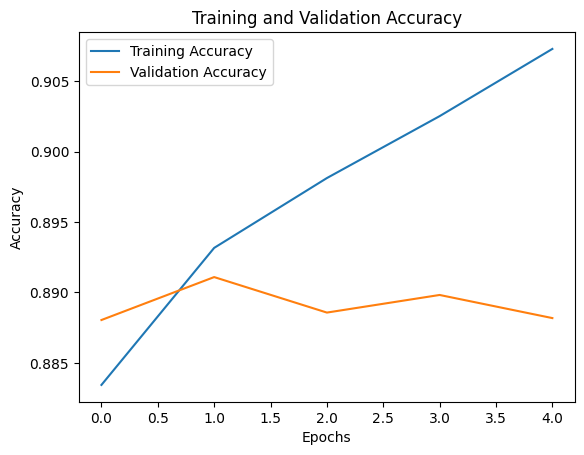

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

# Generate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63     17139
           1       0.91      0.96      0.94     85250

    accuracy                           0.89    102389
   macro avg       0.82      0.75      0.78    102389
weighted avg       0.88      0.89      0.88    102389



#### Conclusion:-   The results demonstrate that deep learning models like LSTM are well-suited for sentiment analysis tasks, especially when dealing with complex language patterns. While traditional models like Logistic Regression and Naive Bayes provide a solid baseline, LSTM’s superior handling of sequence data makes it the best choice for hotel sentiment analysis.

